# Calculations for "Simple models for the trapping of charged macromolecules and particles by diffusiophoresis along salt gradients" by Sear and Warren

inspired by experiments, by for example [McDermott et al.](https://pubs.acs.org/doi/10.1021/la303410w)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Basic salt properties and DP coefficient

In [2]:
D_Cl=20.3e-10
print('Cl- D_- ',D_Cl,'m2/s')
D_Na=13.3e-10
print('Na+ D_+ ',D_Na,'m2/s')
D_salt=2.0*D_Na*D_Cl/(D_Na+D_Cl)
print('salt diffusion constant ',D_salt)
print('NaCl salt D ',D_salt,'m2/s')
beta_salt=(D_Na-D_Cl)/(D_Na+D_Cl)
print('beta for salt 1 NaCl ',beta_salt)
#
epsilon0=8.8541e-12
epsilon_water=80*epsilon0
kT=1.3806e-23*(273+20)
# assume deionised water is 10 microM
c_ion_deionised_water_muM=10.0
print('conc of ions (plus or minus) of de-ionised water ',c_ion_deionised_water_muM,' uM')
c_ion_deionised_water=c_ion_deionised_water_muM*1.0e-6*6.022e26
print('conc of ions (plus or minus) of de-ionised water ',c_ion_deionised_water,' /m^3')
e_elec=1.6021766e-19
Debye_length=np.sqrt(epsilon_water*kT/(2.0*c_ion_deionised_water*e_elec**2))
print('estimated Debye length in de-ionised water ',Debye_length)


Cl- D_-  2.03e-09 m2/s
Na+ D_+  1.33e-09 m2/s
salt diffusion constant  1.6070833333333333e-09
NaCl salt D  1.6070833333333333e-09 m2/s
beta for salt 1 NaCl  -0.2083333333333333
conc of ions (plus or minus) of de-ionised water  10.0  uM
conc of ions (plus or minus) of de-ionised water  6.021999999999999e+21  /m^3
estimated Debye length in de-ionised water  9.626960538080732e-08


plot some example radial speeds

lambda_X  100.0  um - lengthscale for salt source to dominate


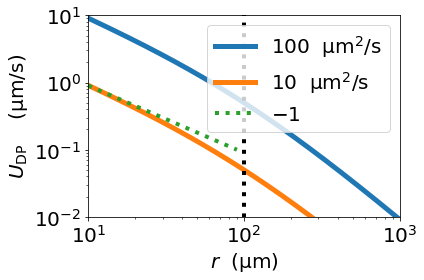

In [3]:
lambda_X=1.0e-4
print('lambda_X ',round(lambda_X*1.0e6,2),' um - lengthscale for salt source to dominate')


def uDP_calc_spherical(r1):
    uDP1=-Gamma_DP/(r1+r1**2/lambda_X)
    return uDP1


r_inner=1.0e-5
r_outer=1.0e-3

r_array=np.linspace(r_inner,r_outer,2500)
#
Gamma_DP=1.0e-10
uDP1=uDP_calc_spherical(r_array)
stringy=str(int(Gamma_DP*1.0e12))+"  $\mathrm{\mu}$m$^2$/s"
plt.loglog(r_array/1.0e-6,-uDP1*1.0e6,lw=5,label=stringy)

Gamma_DP=1.0e-11
uDP2=uDP_calc_spherical(r_array)
stringy=str(int(Gamma_DP*1.0e12))+"  $\mathrm{\mu}$m$^2$/s"
plt.loglog(r_array/1.0e-6,-uDP2*1.0e6,lw=5,label=stringy)

plt.loglog([lambda_X*1.0e6,lambda_X*1.0e6],[1.0e-6,10.0],lw=4,ls='dotted',color='k')
#
rm1=np.geomspace(10,90,10)
um1=9.0*rm1**(-1)
plt.loglog(rm1,um1,ls=':',lw=4,label='$-1$')
#rm2=np.geomspace(110,190,10)
#um2=9.0*rm1**(-2)
#plt.loglog(rm2,um2,ls=':',lw=3,label='$-2$')
#
plt.xlabel('$r$  ($\mathrm{\mu}$m)',fontsize=20)
plt.ylabel('$U_{\mathrm{DP}}$    ($\mathrm{\mu}$m/s)',fontsize=20)
plt.ylim([1.0e-2,1.0e1])
plt.xlim([r_inner*1.0e6,r_outer*1.0e6])
plt.legend(fontsize=20,loc='upper right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('UDP3D.pdf')
plt.show()

now for plots of steady state concentration near spherical source in large volume

exponent rho  -3.0
exponent rho  1.0
exponent rho  3.0
exponent rho  10.0
exponent rho  3.0
lambda_X 2e-05
lambda_X 0.0001
exponent rho  -3.0


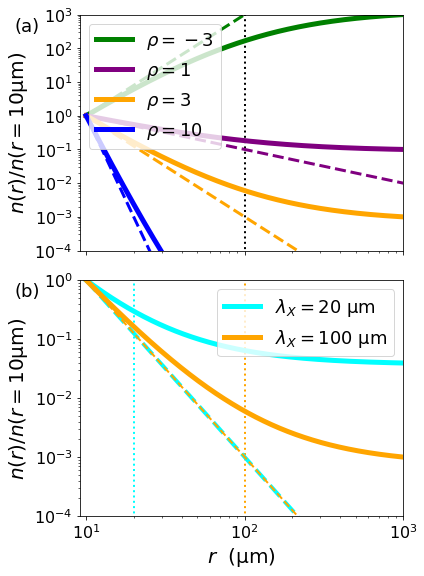

In [4]:
def csalt_calc_spherical(r1):
    csalt1=lambda_X/r1 + 1.0
    return csalt1


r_inner=1.0e-5
r_outer=1.0e-3
r_array=np.linspace(r_inner,r_outer,25000)
#

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

#
rho_exponent=-3.0
print('exponent rho ',rho_exponent)
cparticle=(csalt_calc_spherical(r_array)/ \
            csalt_calc_spherical(r_inner))**rho_exponent
ax1.loglog(r_array/1.0e-6,cparticle,lw=5,label='$\\rho=-3$',color='green')
ax1.loglog(r_array/1.0e-6,(r_array[0]/r_array)**rho_exponent,lw=3,ls='dashed',color='green')

#
rho_exponent=1.0
print('exponent rho ',rho_exponent)
cparticle=(csalt_calc_spherical(r_array)/ \
            csalt_calc_spherical(r_inner))**rho_exponent
ax1.loglog(r_array/1.0e-6,cparticle,lw=5,label='$\\rho=1$',color='purple')
ax1.loglog(r_array/1.0e-6,(r_array[0]/r_array)**rho_exponent,lw=3,ls='dashed',color='purple')

#
rho_exponent=3.0
print('exponent rho ',rho_exponent)
cparticle=(csalt_calc_spherical(r_array)/ \
            csalt_calc_spherical(r_inner))**rho_exponent
ax1.loglog(r_array/1.0e-6,cparticle,lw=5,label='$\\rho=3$',color='orange')
ax1.loglog(r_array/1.0e-6,(r_array[0]/r_array)**rho_exponent,lw=3,ls='dashed',color='orange')



#
rho_exponent=10.0
print('exponent rho ',rho_exponent)
#
cparticle=(csalt_calc_spherical(r_array)/ \
            csalt_calc_spherical(r_inner))**rho_exponent
ax1.loglog(r_array/1.0e-6,cparticle,lw=5,label='$\\rho=10$',color='blue')
ax1.loglog(r_array/1.0e-6,(r_array[0]/r_array)**rho_exponent,lw=3,ls='dashed',color='blue')

# line at lambda_X
ax1.loglog([lambda_X*1.0e6,lambda_X*1.0e6],[1.0e-6,1.0e6],lw=2,ls='dotted',color='k',zorder=-9)

ax1.set_ylabel('$n(r)/n(r=10\mathrm{\mu}$m$)$',fontsize=20)
ax1.set_ylim([1.0e-4,1.0e3])
ax1.set_xlim([r_inner*1.0e6/1.1,r_outer*1.0e6])
ax1.legend(fontsize=18)#,loc='upper right')
#ax1.set_xticks(fontsize=20)
#ax1.set_yticks(fontsize=20)
''''
2nd plot
'''
rho_exponent=3.0
print('exponent rho ',rho_exponent)
#lambda_X=10.0e-6
#print('lambda_X',lambda_X)
#cparticle=(csalt_calc_spherical(r_array)/ \
#            csalt_calc_spherical(r_inner))**rho_exponent
#ax2.loglog(r_array/1.0e-6,cparticle,lw=5,label='$\lambda_X=25~\mathrm{\mu}$m')
# line at lambda_X
#ax2.loglog([lambda_X*1.0e6,lambda_X*1.0e6],[1.0e-6,10.0],lw=2,ls='dotted',color='blue',zorder=-9)
#
lambda_X=20.0e-6
print('lambda_X',lambda_X)
cparticle=(csalt_calc_spherical(r_array)/ \
            csalt_calc_spherical(r_inner))**rho_exponent
ax2.loglog(r_array/1.0e-6,cparticle,lw=5,label='$\lambda_X=20~\mathrm{\mu}$m',color='cyan')
ax2.loglog(r_array/1.0e-6,(r_array[0]/r_array)**rho_exponent,lw=4,ls='dashed',color='cyan')
ax2.loglog([lambda_X*1.0e6,lambda_X*1.0e6],[1.0e-6,10.0],lw=2,ls='dotted',color='cyan',zorder=-9)
#
lambda_X=100.0e-6
print('lambda_X',lambda_X)
cparticle=(csalt_calc_spherical(r_array)/ \
            csalt_calc_spherical(r_inner))**rho_exponent
ax2.loglog(r_array/1.0e-6,cparticle,lw=5,label='$\lambda_X=100~\mathrm{\mu}$m',color='orange')
ax2.loglog(r_array/1.0e-6,(r_array[0]/r_array)**rho_exponent,lw=2,ls='dashed',color='orange')
ax2.loglog([lambda_X*1.0e6,lambda_X*1.0e6],[1.0e-6,1.0e6],lw=2,ls='dotted',color='orange',zorder=-9)

rho_exponent=-3.0
print('exponent rho ',rho_exponent)
cparticle=(csalt_calc_spherical(r_array)/ \
            csalt_calc_spherical(r_inner))**rho_exponent
#ax2.loglog(r_array/1.0e-6,cparticle,lw=5,label='$\lambda_X=100~\mathrm{\mu}$m',color='green')
#ax2.loglog(r_array/1.0e-6,(r_array[0]/r_array)**rho_exponent,lw=3,ls='dashed',color='green')


ax2.set_ylim([1.0e-4,1.0e0])
ax2.legend(fontsize=18,loc='upper right')

#plt.xlabel('$r$  ($\mathrm{\mu}$m)',fontsize=20)
ax2.set_xlabel('$r$  ($\mathrm{\mu}$m)',fontsize=20)
ax2.set_ylabel('$n(r)/n(r=10\mathrm{\mu}$m$)$',fontsize=20)



# Adjust xtick label size for both subplots
ax1.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax1.text(-0.2, 0.93, '(a)', transform=ax1.transAxes, fontsize=18)  # Add text (b)
ax2.text(-0.2, 0.93, '(b)', transform=ax2.transAxes, fontsize=18)  # Add text (b)

##
plt.tight_layout()
plt.savefig('local3D.pdf')
plt.show()

now for 1 D case

In [5]:
c0=0.1
c1=1.0
print('c0, c1 ',c0,c1)

c0, c1  0.1 1.0


L length in 1D 100.0  um
Gamma 10.0  um^2/s
Gamma 100.0  um^2/s


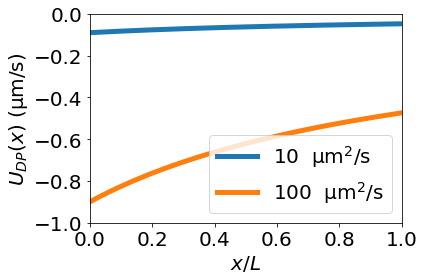

In [6]:

L=100.0e-6
print('L length in 1D',L*1.0e6,' um')
#
def U_of_x(x):
    ratio=(c1-c0)/c1
    UDP1D=-(Gamma_DP/L)*ratio/(1.0+ratio*x/L)
    return UDP1D


xplot=np.linspace(0,100.0e-6,200)

Gamma_DP=10.0e-12
print('Gamma',Gamma_DP*1.0e12,' um^2/s')
stringy=str(int(Gamma_DP*1.0e12))+"  $\mathrm{\mu}$m$^2$/s"
plt.plot(xplot/L,U_of_x(xplot)*1.0e6,lw=5,label=stringy)

Gamma_DP=100.0e-12
print('Gamma',Gamma_DP*1.0e12,' um^2/s')
stringy=str(int(Gamma_DP*1.0e12))+"  $\mathrm{\mu}$m$^2$/s"
plt.plot(xplot/L,U_of_x(xplot)*1.0e6,lw=5,label=stringy)


plt.xlabel('$x/L$',fontsize=20)
plt.ylabel('$U_{DP}(x)$ ($\mathrm{\mu}$m/s)',fontsize=20)
plt.ylim([-1.0,0.0])
plt.xlim([0,1])
plt.legend(fontsize=20)#,loc='upper right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('UDP1D.pdf')
plt.show()

L length in 1D 100.0  um


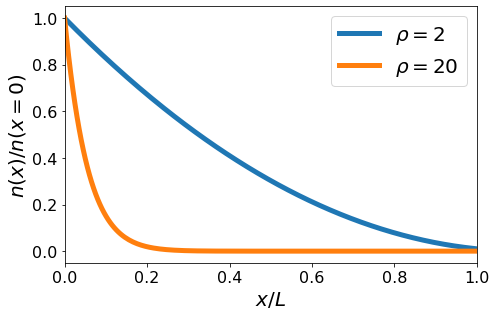

In [7]:
L=100.0e-6
print('L length in 1D',L*1.0e6,' um')

#
def csalt_of_x(x):
    csalt=c1-(c1-c0)*(x/L)
    return csalt
##


fig, ax1 = plt.subplots(1, 1, figsize=(7, 4.5))

rho1D=2.0
c1Dplot=(csalt_of_x(xplot))**rho1D
ax1.plot(xplot/L,c1Dplot,lw=5,label='$\\rho=2$')

rho1D=20.0
c1Dplot=(csalt_of_x(xplot))**rho1D
ax1.plot(xplot/L,c1Dplot,lw=5,label='$\\rho=20$')


ax1.set_xlabel('$x/L$',fontsize=20)
ax1.set_ylabel('$n(x)/n(x=0)$',fontsize=20)
#plt.ylim([1.0e-3,1.0])

# Adjust xtick label size for both subplots
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)

ax1.set_xlim([0,1])
ax1.legend(fontsize=20)#,loc='upper right')
plt.tight_layout()
plt.savefig('local1D.pdf')
plt.show()